In [1]:
#importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
#Charger le dataset
df = pd.read_csv("diabetes.csv")
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Outcome
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      442 non-null    float64
 1   sex      442 non-null    float64
 2   bmi      442 non-null    float64
 3   bp       442 non-null    float64
 4   s1       442 non-null    float64
 5   s2       442 non-null    float64
 6   s3       442 non-null    float64
 7   s4       442 non-null    float64
 8   s5       442 non-null    float64
 9   s6       442 non-null    float64
 10  Outcome  442 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 38.1 KB


<Axes: title={'center': 'Répartition des classes'}, xlabel='Outcome'>

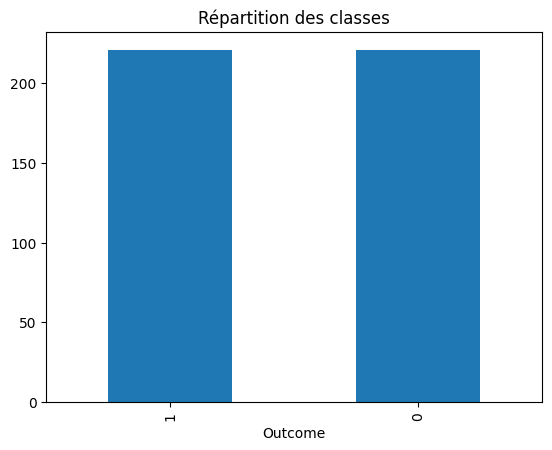

In [3]:
#Analyse et traitement des données
df.info()
df.describe()
df['Outcome'].value_counts().plot(kind='bar', title='Répartition des classes')

In [5]:
#étape de prétraitement
##les colonnes à prétraiter
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
##pipline
pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_preprocessed = pipeline.fit_transform(X)


In [7]:
#division des données en partie entrainement et partie test
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)


In [8]:
#la partie modèle
from sklearn.neighbors import KNeighborsClassifier

model_lr = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=5)

# Entraînement
model_lr.fit(X_train, y_train)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

Régression logistique :
              precision    recall  f1-score   support

           0       0.78      0.69      0.73        45
           1       0.71      0.80      0.75        44

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89

KNN (k=5) :
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        45
           1       0.75      0.75      0.75        44

    accuracy                           0.75        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.75      0.75      0.75        89



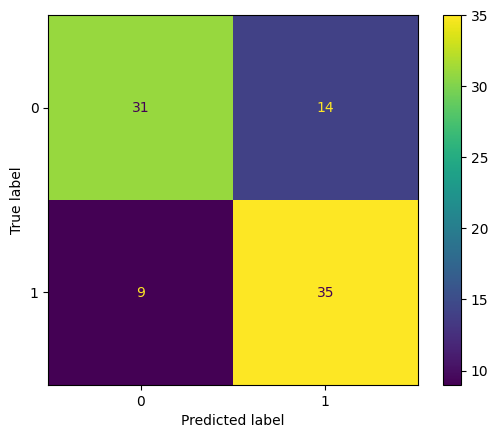

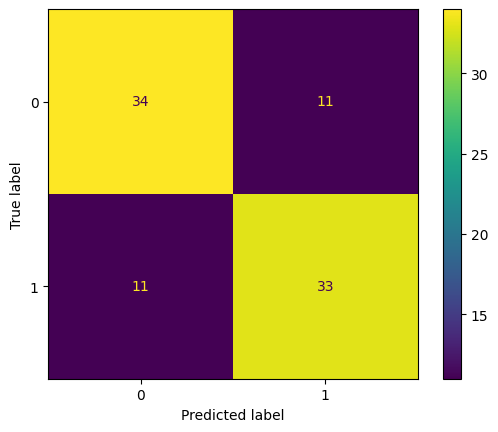

In [9]:
#la regression logistique
y_pred_lr = model_lr.predict(X_test)
print("Régression logistique :")
print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot()

#KNN
y_pred_knn = model_knn.predict(X_test)
print("KNN (k=5) :")
print(classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot()

In [11]:
#validation croisée
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_lr = cross_val_score(model_lr, X_preprocessed, y, cv=skf)
scores_knn = cross_val_score(model_knn, X_preprocessed, y, cv=skf)

print("Cross-Val Logistic Regression:", scores_lr.mean())
print("Cross-Val KNN:", scores_knn.mean())


Cross-Val Logistic Regression: 0.7487997957099082
Cross-Val KNN: 0.6945097037793666
